<a href="https://www.kaggle.com/code/deepakkaura/spam-detection-nlp-capstone-project-version-2?scriptVersionId=132607910" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# ***Capstone Project (version 2) on Spam Detection (NLP)***


#### *By Deepak Kaura*

### **Problem Statement : -**

Spam messages are a major nuisance for mobile phone users. They can be annoying, time-consuming, and even harmful. In some cases, spam messages can contain phishing links that can steal personal information or install malware on a device.

The Spam Text Message Classification dataset is a valuable resource for developing machine learning models that can automatically filter spam messages from a user's inbox. The dataset contains a large number of SMS messages that have been labeled as either "ham" (legitimate) or "spam." This data can be used to train a machine learning model to identify the linguistic features that are associated with spam messages.

A well-trained spam filter can significantly reduce the amount of spam that a user receives. This can save users time and frustration, and it can also help to protect them from potential security threats.




**The following are some of the features of the data:**

* The number of words in the message.
* The number of characters in the message.
* The number of punctuation marks in the message.
* The number of special characters in the message.
* The presence of certain keywords in the message.

In [1]:
!pip install text-hammer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 4.5 MB/s eta 0:00:00
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.12.2
    Uninstalling beautifulsoup4-4.12.2:
      Successfully uninstalled beautifulsoup4-4.12.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
momepy 0.6.0 requires shapely>=2, but you have shapely 1.8.5.post1 which is incompatible.


## **Import Libraries**

In [2]:
import pandas as pd
import numpy
import nltk
import text_hammer as th
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

## **Loading and Reading the data**

In [3]:
# Loading data
df = pd.read_csv('/kaggle/input/spam-text-message-classification/SPAM text message 20170820 - Data.csv')

df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


**Making a separate copy of dataframe for model building**

In [4]:
# Create a copy of the DataFrame

df_ml = df.copy()

## **Checking length of the dataset**

In [5]:
print(f'Length of the dataset: {df.shape}')

Length of the dataset: (5572, 2)


## **Checking data type of each column in dataset**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


## **Checking missing values from the dataset**

In [7]:
print(f'Checking missing values of the dataset:')

df.isnull().sum()

Checking missing values of the dataset:


Category    0
Message     0
dtype: int64

## **Checking the duplicates from the dataset**

In [8]:
print(f'Checking duplicates from the dataset:')

df.duplicated().sum()

Checking duplicates from the dataset:


415

* **Note - It seems datasets have 415 duplicate enteries, we will handle it later when we do model building**

## **Exploratory Data Analysis : Self-explanatory visualizations**

In [9]:
# Create a bar chart
groups = df.groupby(by='Category').count().Message
Count_HAM = groups[0]
Count_SPAM = groups[1]
fig = go.Figure()
fig.add_trace(go.Bar(
    x=['Ham', 'Spam'],
    y=[Count_HAM, Count_SPAM],
    marker_color='indianred',
    width=[0.4, 0.4],
    text=[f'Count_HAM: {Count_HAM}', f'CNT_SPAM: {Count_SPAM}']))

fig.update_layout(title='Classes and their number in the dataset', title_x=0.5)

# Show the figure
fig.show()

In [10]:
#Calculate the average length of ham and spam messages
ham_message_length = []
spam_message_length = []
for i in df.values:
    if(i[0] == "ham"):
        ham_message_length.append(len(i[1]))
    else:
        spam_message_length.append(len(i[1]))
        
# average
ham_average = sum(ham_message_length)/len(ham_message_length)
spam_average = sum(spam_message_length)/len(spam_message_length)
print("ham_average: ", ham_average)
print("spam_average: ", spam_average)

ham_average:  71.44829015544042
spam_average:  137.9892904953146


In [11]:
#Create a bar chart
fig = px.bar(x=['ham_average', 'spam_average'], y=[ham_average, spam_average], title='Average length of ham and spam messages', labels=dict(x='', y=''), text=[f'ham_average: {ham_average}', f'spam_average: {spam_average}'])

#Show the figure
fig.show()

In [12]:
def text_preprocessing(df,col_name):
    column = col_name
    df[column] = df[column].progress_apply(lambda x:str(x).lower())
    df[column] = df[column].progress_apply(lambda x: th.cont_exp(x)) #you're -> you are; i'm -> i am
    df[column] = df[column].progress_apply(lambda x: th.remove_emails(x))
    df[column] = df[column].progress_apply(lambda x: th.remove_html_tags(x))
    df[column] = df[column].progress_apply(lambda x: th.remove_stopwords(x))
#     df[column] = df[column].progress_apply(lambda x:th.spelling_correction(x))
  
    df[column] = df[column].progress_apply(lambda x: th.remove_special_chars(x))
    df[column] = df[column].progress_apply(lambda x: th.remove_accented_chars(x))
    df[column] = df[column].progress_apply(lambda x: th.make_base(x)) #ran -> run,
    return(df)

In [13]:
cleaned_df = text_preprocessing(df, "Message")

  0%|          | 0/5572 [00:00<?, ?it/s]

  0%|          | 0/5572 [00:00<?, ?it/s]

  0%|          | 0/5572 [00:00<?, ?it/s]

  0%|          | 0/5572 [00:00<?, ?it/s]

  0%|          | 0/5572 [00:00<?, ?it/s]

  0%|          | 0/5572 [00:00<?, ?it/s]

  0%|          | 0/5572 [00:00<?, ?it/s]

  0%|          | 0/5572 [00:00<?, ?it/s]

In [14]:
### Calculating the word frequency by using nltk
words_list = []
for sentence in cleaned_df.Message:
    words_list.extend(nltk.word_tokenize(sentence))
freq_dist = nltk.FreqDist(words_list)
freq_dist.most_common(20)

[('2', 481),
 ('you', 453),
 ('not', 413),
 ('go', 341),
 ('come', 324),
 ('I', 299),
 ('4', 293),
 ('do', 292),
 ('know', 287),
 ('get', 285),
 ('good', 279),
 ('ok', 278),
 ('free', 276),
 ('send', 273),
 ('like', 254),
 ('day', 242),
 ('want', 241),
 ('time', 236),
 ('love', 232),
 ('now', 231)]

In [15]:
# Create a DataFrame of the top 25 words
temp = pd.DataFrame(freq_dist.most_common(25), columns=['word', 'count'])

# Create a bar plot
fig = px.bar(temp, x='word', y='count', title='Top words')

# Rotate the x-ticks vertically
fig.update_layout(xaxis_tickangle=90)

# Show the plot
fig.show()

### **Handling the duplicates**

In [16]:
# Specify the columns to check for duplicates
columns_to_check = ['Category', 'Message']  # Replace with the actual column names

# Check for duplicate entries based on specified columns
duplicate_entries = df_ml[df_ml.duplicated(subset=columns_to_check, keep=False)]

# Print the duplicate entries
print(duplicate_entries)

     Category                                            Message
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
7         ham  As per your request 'Melle Melle (Oru Minnamin...
8        spam  WINNER!! As a valued network customer you have...
9        spam  Had your mobile 11 months or more? U R entitle...
11       spam  SIX chances to win CASH! From 100 to 20,000 po...
...       ...                                                ...
5524     spam  You are awarded a SiPix Digital Camera! call 0...
5535      ham  I know you are thinkin malaria. But relax, chi...
5539      ham                         Just sleeping..and surfing
5553      ham                        Hahaha..use your brain dear
5558      ham                             Sorry, I'll call later

[704 rows x 2 columns]


In [17]:
# Remove duplicates
df_no_duplicates = df_ml.drop_duplicates(inplace=True)

In [18]:
df_ml.shape

(5157, 2)

## **Model Building**

#### **Data Preprocessing**

In [19]:
df_ml['b_labels'] = df_ml['Category'].map({'ham':0, 'spam':1})
df_ml

,Category,Message,b_labels
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will ü b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


In [20]:
Y = df_ml['b_labels'].to_numpy()
Y

array([0, 0, 1, ..., 0, 0, 0])

In [21]:
cv = CountVectorizer(decode_error='ignore')
X = cv.fit_transform(df_ml['Message'])
X.shape

(5157, 8709)

#### **Train-Test split**

In [22]:
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.22)

***Model Prediction and show model's performance in visualization form***

Now we are ready to train a model and predict the required solution. Our problem is a classification problem (using machine learning's top classification models) : -

* Decision Tree Classifier

* Random Forest Classifier

* Logistic Regression

* XGBoost Classifier

* Support Vector Machine Classifier

* **Decision Tree Classifier Model**

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

dt_model=DecisionTreeClassifier().fit(xtrain,ytrain)

dt_pred= dt_model.predict(xtest)
dt_score = accuracy_score(ytest,dt_pred)
print('Decision Tree accuracy score:', dt_score)

Decision Tree accuracy score: 0.9621145374449339


**Classification Report of Decision Tree Classifier**

In [24]:
print(classification_report(ytest,dt_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1002
           1       0.84      0.84      0.84       133

    accuracy                           0.96      1135
   macro avg       0.91      0.91      0.91      1135
weighted avg       0.96      0.96      0.96      1135



**Visualizing Decision Tree Classifier confusion matrix and accuracy score**

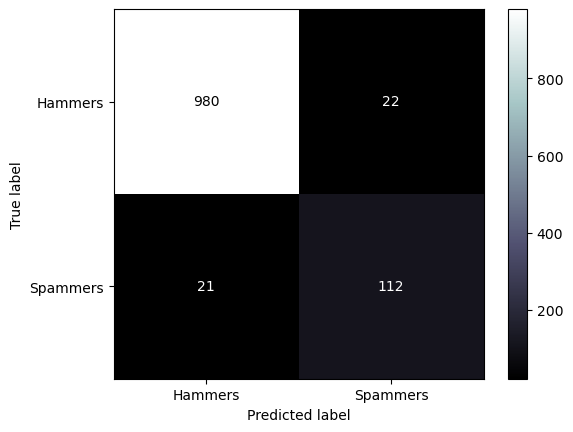

In [25]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

cm_dt = confusion_matrix(ytest, dt_pred)
  
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=['Hammers', 'Spammers'])
  
cm_display.plot(cmap='bone')
plt.show()

**Decision Tree Classifier : Confusion Matrix Results**

* True positive ("Hammer" and predicted value "Hammer") True prediction ------ 981

* True negative ("Spamer" and predicted value "Spammer") True prediction ------ 119

* False positive ("Spammer" and predicted value "Hammer") Type-1 error ------- 16

* False negative ("Hammer" and predicted value "Spammer") Type-2 error ------ 19

* **Random Forest Classifier Model**

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

rfc = RandomForestClassifier(n_estimators=100, random_state=0)

rfc_model = rfc.fit(xtrain, ytrain)

rfc_pred= rfc_model.predict(xtest)

rfc_score = accuracy_score(ytest , rfc_pred)
print('Random Forest accuracy score:', rfc_score)

Random Forest accuracy score: 0.9753303964757709


**Clasiification Report of Random Forest Classifier**

In [27]:
print(classification_report(ytest,rfc_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1002
           1       0.99      0.80      0.88       133

    accuracy                           0.98      1135
   macro avg       0.98      0.90      0.93      1135
weighted avg       0.98      0.98      0.97      1135



**Visualize Random Forest Classifier confusion matrix and accuracy score**

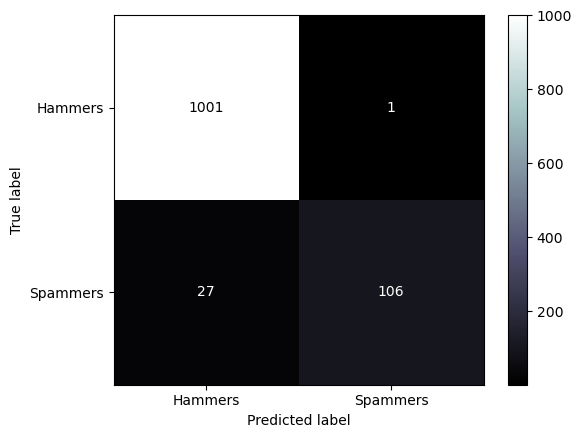

In [28]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

cm_rfc = confusion_matrix(ytest, rfc_pred)
  
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm_rfc, display_labels=['Hammers', 'Spammers'])
  
cm_display.plot(cmap='bone')
plt.show()

**Random Forest Classifier : Confusion Matrix Results**

* True positive ("Hammer" and predicted value "Hammer") True prediction ------ 996

* True negative ("Spamer" and predicted value "Spammer") True prediction ------ 114

* False positive ("Spammer" and predicted value "Hammer") Type-1 error ------- 1

* False negative ("Hammer" and predicted value "Spammer") Type-2 error ------ 24

* **Logistic Regression Model**

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

lr_model = LogisticRegression().fit(xtrain,ytrain)

lr_pred = lr_model.predict(xtest)

lr_score = accuracy_score(ytest , lr_pred)
print('Logistic Regression accuracy score:', lr_score)

Logistic Regression accuracy score: 0.9814977973568282


**Classification Report of Logistic Regression**

In [30]:
print(classification_report(ytest,lr_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1002
           1       0.97      0.87      0.92       133

    accuracy                           0.98      1135
   macro avg       0.97      0.93      0.95      1135
weighted avg       0.98      0.98      0.98      1135



**Visualize Logistic Regression confusin matrix and accuracy score**

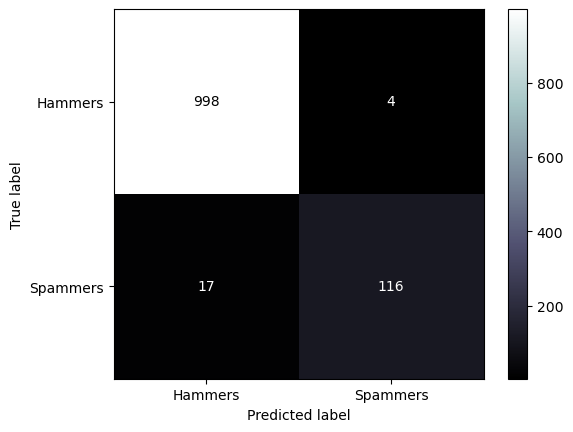

In [31]:
from pandas.core.dtypes.cast import construct_2d_arraylike_from_scalar
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

cm_lr = confusion_matrix(ytest, lr_pred)
  
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=['Hammers', 'Spammers'])
  
cm_display.plot(cmap='bone')
plt.show()

**Logistic Regression : Confusion Matrix Results**

* True positive ("Spammer" and predicted value "Hammer") True prediction ------996

* True negative ("Spamer" and predicted value "Spammer") True prediction ------ 121

* False positive ("Spammer" and predicted value "Hammer") Type-1 error ------- 1

* False negative ("Hammer" and predicted value "Spammer") Type-2 error ------ 17

* **XGBoost Classifier Model**

In [32]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

xgb_model = XGBClassifier().fit(xtrain,ytrain)

xgb_pred = xgb_model.predict(xtest)

xgb_score = accuracy_score(ytest , xgb_pred)
print('XGBoost accuracy score:', xgb_score)

XGBoost accuracy score: 0.9814977973568282


**Classification Report of XGBoost Classifier**

In [33]:
print(classification_report(ytest,xgb_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1002
           1       0.94      0.90      0.92       133

    accuracy                           0.98      1135
   macro avg       0.96      0.95      0.95      1135
weighted avg       0.98      0.98      0.98      1135



**Visualize XGBoost Classifier confusion matrix and accuracy score**

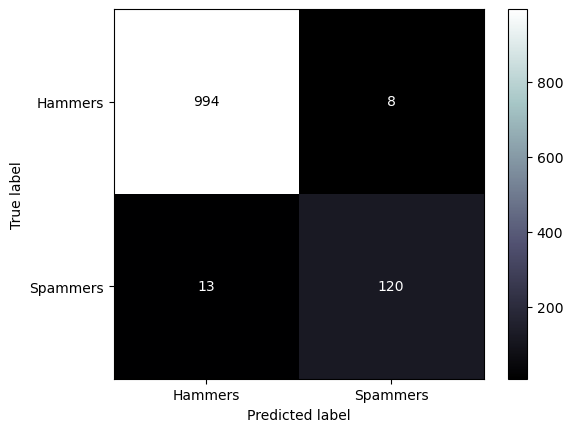

In [34]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

cm_xgb = confusion_matrix(ytest, xgb_pred)
  
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=['Hammers', 'Spammers'])
  
cm_display.plot(cmap='bone')
plt.show()

**XGBoost Classifier : Confusion Matrix Results**

* True positive ("Hammer" and predicted value "Hammer") True prediction ------ 994

* True negative ("Spamer" and predicted value "Spammer") True prediction ------ 119

* False positive ("Spammer" and predicted value "Hammer") Type-1 error ------- 3

* False negative ("Hammer" and predicted value "Spammer") Type-2 error ------ 19

* **Support Vector Machine Classifier Model**

In [35]:
from sklearn import svm
from sklearn.metrics import classification_report

# Create an SVM model
svm_model = svm.SVC(kernel='linear').fit(xtrain, ytrain)

# Make predictions
svm_pred = svm_model.predict(xtest)

# Calculate the accuracy score
svm_score = accuracy_score(ytest, svm_pred)

print('SVM accuracy score:', svm_score)

SVM accuracy score: 0.9859030837004406


**Classification Report of Support Vector Machine Classification**

In [36]:
print(classification_report(ytest,svm_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1002
           1       0.98      0.89      0.94       133

    accuracy                           0.99      1135
   macro avg       0.98      0.95      0.96      1135
weighted avg       0.99      0.99      0.99      1135



**Visualize Support Vector Machine Classification confusion matrix and accuracy score**

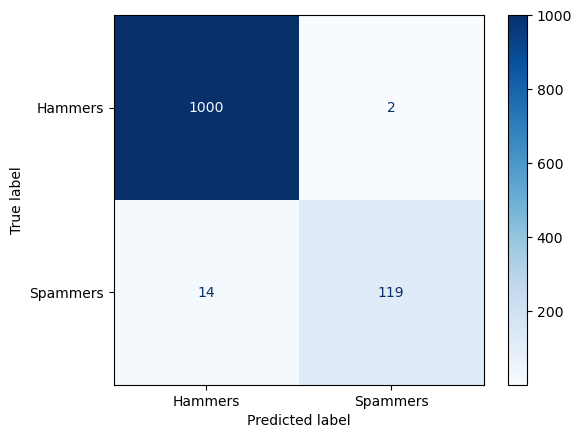

In [37]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

cm_svm = confusion_matrix(ytest, svm_pred)
  
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=['Hammers', 'Spammers'])
  
cm_display.plot(cmap='Blues')
plt.show()

**Support Vector Machine Classifier : Confusion Matrix Results**

* True positive ("Hammer" and predicted value "Hammer") True prediction ------ 996

* True negative ("Spamer" and predicted value "Spammer") True prediction ------ 124

* False positive ("Spammer" and predicted value "Hammer") Type-1 error ------- 1

* False negative ("Hammer" and predicted value "Spammer") Type-2 error ------ 14

### **Summarizing Model results and their performance, Visualization**

In [38]:
models = pd.DataFrame({'Model': ['Logistic Regression','Random Forest','Decision Tree','XGBoost Classifier', 'Support Vector Machine'],
                       'Score': [lr_score*100 , rfc_score*100, dt_score*100, xgb_score*100, svm_score*100]}).round(2)

models.sort_values(by='Score', ascending=False)

,Model,Score
4,Support Vector Machine,98.59
0,Logistic Regression,98.15
3,XGBoost Classifier,98.15
1,Random Forest,97.53
2,Decision Tree,96.21


#### **Visulaizing models accuracy scores**

In [39]:

# Define the text for each model (including model name and score)
models['Text'] = [f'{model}: {score:.2f}' for model, score in zip(models['Model'], models['Score'])]

# Create a horizontal bar plot
fig = px.bar(models, y="Model", x="Score", color="Model", text='Text', orientation='h', title="Comparing ML Algorithms")

# Set the x-axis label and its size
fig.update_layout(xaxis_title="Accuracy", xaxis_title_font_size=13)

# Set the y-axis label and its size
fig.update_layout(yaxis_title="Model", yaxis_title_font_size=14)

# Show the plot
fig.show()

* **Note : Through this it's tough to select our best fit model, so below we will explore more parameters which will helps us to find right fit alogrithm**

#### **False positive ("Spammer" and predicted value "Hammer") Type-1 error**

let's visualize this to check that which model has lesser number of Type-1 error.

In [40]:
models1 = pd.DataFrame({'Model': ['Decision Tree','Random Forest','Logistic Regression','XGBoost Classifier','Support Vector Machine'],
                       'False Positives': [cm_dt[0,1],cm_rfc[0,1],cm_lr[0,1],cm_xgb[0,1], cm_svm[0,1]]})

models1.sort_values(by='False Positives', ascending=False)

,Model,False Positives
0,Decision Tree,22
3,XGBoost Classifier,8
2,Logistic Regression,4
4,Support Vector Machine,2
1,Random Forest,1


In [41]:
# Sort the DataFrame by 'False Positives' column in descending order
models1 = models1.sort_values(by='False Positives', ascending=False)

# Define the text for each model (including model name and score)
models1['Text'] = [f'{model}: {score}' for model, score in zip(models1['Model'], models1['False Positives'])]

# Create a horizontal bar plot
fig = px.bar(models1, y="Model", x="False Positives", color="Model", text='Text', orientation='h', title="Comparing ML Algorithms")

# Set the x-axis label and its size
fig.update_layout(xaxis_title="False Positives", xaxis_title_font_size=13)

# Set the y-axis label and its size
fig.update_layout(yaxis_title="Model", yaxis_title_font_size=14)

# Show the plot
fig.show()

* **Note : Seems Decision Tree has the the most wrong prediction in terms of Spammer but predicted as Hammer and can not be rely as per Type-1 error.**

#### **False negative ("Hammer" and predicted value "Spammer") Type-2 error**

let's visualize this to check that which model has lesser number of Type-2 error.

In [42]:
models2 = pd.DataFrame({'Model': ['Decision Tree','Random Forest','Logistic Regression','XGBoost Classifier','Support Vector Machine'],
                       'False negative': [cm_dt[1,0],cm_rfc[1,0],cm_lr[1,0],cm_xgb[1,0], cm_svm[1,0]]})

models2.sort_values(by='False negative', ascending=False)

,Model,False negative
1,Random Forest,27
0,Decision Tree,21
2,Logistic Regression,17
4,Support Vector Machine,14
3,XGBoost Classifier,13


In [43]:
# Define the text for each model (including model name and score)
models2['Text'] = [f'{model}: {score}' for model, score in zip(models2['Model'], models2['False negative'])]

# Create a horizontal bar plot
fig = px.bar(models2, y="Model", x="False negative", color="Model", text='Text', orientation='h', title="Comparing ML Algorithms")

# Set the x-axis label and its size
fig.update_layout(xaxis_title="False Negative", xaxis_title_font_size=13)

# Set the y-axis label and its size
fig.update_layout(yaxis_title="Model", yaxis_title_font_size=14)

# Show the plot
fig.show()

* **Note : Seems Support Vector Machine has lesser amount for this Type-1 error and but here during Type-2 error it perform same as Type-1 error, which means this model has perform decent and well deserve to pick.**

#### **True negative ("Spamer" and predicted value "Spammer") True prediction**

let's visualize this to observe that which alogrithm has predicted rightly spammers

In [44]:
models3 = pd.DataFrame({'Model': ['Decision Tree','Random Forest','Logistic Regression','XGBoost Classifier','Support Vector Machine'],
                       'True negative': [cm_dt[1,1],cm_rfc[1,1],cm_lr[1,1],cm_xgb[1,1], cm_svm[1,1]]})

models3.sort_values(by='True negative', ascending=False)

,Model,True negative
3,XGBoost Classifier,120
4,Support Vector Machine,119
2,Logistic Regression,116
0,Decision Tree,112
1,Random Forest,106


In [45]:
# Define the text for each model (including model name and score)
models3['Text'] = [f'{model}: {score}' for model, score in zip(models3['Model'], models3['True negative'])]

# Create a horizontal bar plot
fig = px.bar(models3, y="Model", x="True negative", color="Model", text='Text', orientation='h', title="Comparing ML Algorithms")

# Set the x-axis label and its size
fig.update_layout(xaxis_title="True Negative", xaxis_title_font_size=13)

# Set the y-axis label and its size
fig.update_layout(yaxis_title="Model", yaxis_title_font_size=14)

# Show the plot
fig.show()

* **Note : Here we observed that Support Vector Machine is the best performer and  impress us as compare to other algorithms**

### **Conclusion : -**

* Through-out the examination of all parameters we have noticed that Support Vector Machine was best, and to choose best fit too.

*  Decision Tree was the worst performer during the Type-1 Error evaluation but Support Vector Machine always impress us during Type-2 Error evaluation as well as Type-1 Error evaluation too. 


so as final answer we can choose Support Vector Machine algorithm.